<a href="https://colab.research.google.com/github/d3ath-add3r/Sentiment_Analysis_Using_RNN/blob/main/Nimish_Dalvi_DLExamPaper2_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style type = "text/css">
.bgimg {
    backgroung-image: url("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.dzT0qF83LMnfTq8cRwDcaQHaEK%26pid%3DApi&f=1");
}
</style>

<div class="bgimg" align="center">
<table>
    <tr>
        <td width=20%>
        <img src = https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.uRoHwRvX6pKwT54Rx7ia9QHaE8%26pid%3DApi&f=1>
        </td>
        <td align="center">
            <font face= "Garamond" size ="10" color="Red"> Part II : RNN </font>
            </br>
            <font face= "Georgia" size ="6" color="Orange"> Sentiment Analysis using RNN </font>
</div>

## **About the dataset :**
The Social Dilemma, a documentary-drama hybrid explores the dangerous human impact of social 
networking, with tech experts sounding the alarm on their own creations as the tech experts 
sound the alarm on the dangerous human impact of social networking. This dataset brings you the 
twitter responses made with the #TheSocialDilemma hashtag after watching the eye-opening 
documentary "The Social Dilemma" released in an OTT platform(Netflix) on September 9th, 2020.
<br><br>
**Attribute Information:**
1. user_name - The name of the user, as they’ve defined it.
2. user_location - The user-defined location for this account’s profile.
3. user_description - The user-defined UTF-8 string describing their account.
4. user_created - Time and date, when the account was created.
5. user_followers - The number of followers an account currently has.
6. user_friends – The number of friends an account currently has.
7. user_favourites - The number of favorites an account currently has.
8. user_verified - When true, indicates that the user has a verified account.
9. date - UTC time and date when the Tweet was created.
10. hashtags - All the other hashtags posted in the tweet along with #TheSocialDilemma
11. source - Utility used to post the Tweet, Tweets from the Twitter website have a source 
value – web
12. is_retweet - Indicates whether this Tweet has been Retweeted by the authenticating user.
13. clean_text – Cleaned text of the tweet.
14. Sentiment (target) - Indicates the sentiment of the tweet, consists of three categories: 
Positive, neutral, and negative.
<br><br><br>
The datasets can be accessed from drive folder under folder "Tweets".
<br>
<a href="https://drive.google.com/drive/folders/1YWKIr5yL4mfsiXFAW1Ft7CTxlJ8KRGBh?usp=sharing"> Drive Folder </a>
<br><br>
It has two csv files:
* tweets_train : File with labels for training
* tweets_test : File without labels for prediction.

In [ ]:
# We will use tensorflow version 2.4.1
# Install proper version of Tensorflow
!pip install tensorflow==2.4.1

# **Importing required packages**

In [ ]:
# libraries
import pandas as pd
import numpy as np
import re
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import itertools

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Check tensorflow version
print(tf.__version__)

2.4.1


### **Load Data from Drive**

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set directory
os.chdir("/content/drive/MyDrive/DeepLearningExamPaper2")
!dir

Nimish_Dalvi_DLExamPaper2_RNN.ipynb  Tweets


In [ ]:
# Read training file
df = pd.read_csv("Tweets/tweets_train.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         16999 non-null  object
 1   user_location     13393 non-null  object
 2   user_description  15838 non-null  object
 3   user_created      17000 non-null  object
 4   user_followers    17000 non-null  int64 
 5   user_friends      17000 non-null  int64 
 6   user_favourites   17000 non-null  int64 
 7   user_verified     17000 non-null  bool  
 8   date              17000 non-null  object
 9   hashtags          13351 non-null  object
 10  source            17000 non-null  object
 11  is_retweet        17000 non-null  bool  
 12  clean_text        16992 non-null  object
 13  Sentiment         17000 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.6+ MB
None
(17000, 14)


We can see dtype of each feature and nullvalues are present. We will treat them later. Total there are 17000 rows and 14 columns.

## **Visualisations and EDA :**

The social dilemma has 47.41% Positive tweets
The social dilemma has 34.86% Neutral tweets
The social dilemma has 17.73% Negative tweets


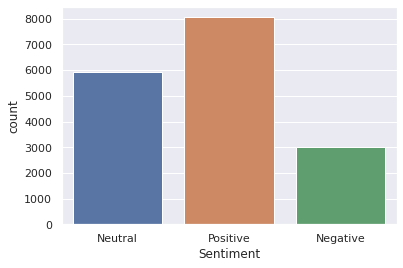

In [ ]:
# Sentiments 
sns.countplot(df["Sentiment"])

# % distribution of each category of sentiment
neu = round(df["Sentiment"].value_counts()[1]/len(df)*100, 2)
pos = round(df["Sentiment"].value_counts()[0]/len(df)*100, 2)
neg = round(df["Sentiment"].value_counts()[2]/len(df)*100, 2)

print("The social dilemma has {}% Positive tweets".format(pos))
print("The social dilemma has {}% Neutral tweets".format(neu))
print("The social dilemma has {}% Negative tweets".format(neg))

We can say the documentary had Positve response.

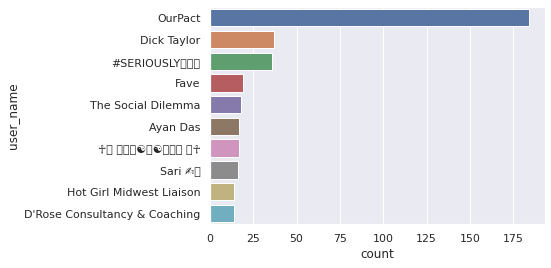

In [ ]:
# Number of tweets by user (top 10)
user = df['user_name'].value_counts().reset_index()
user.columns = ['user_name', 'count']
sns.barplot(x=user.head(10)['count'], y=user.head(10)['user_name'], orientation='horizontal')

User "Our Pact" has most number of tweets around 200 tweets.

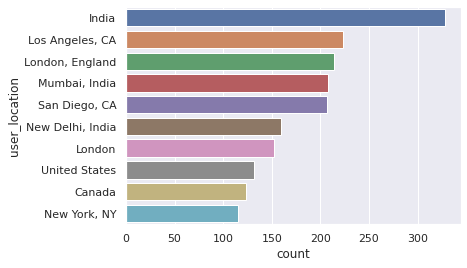

In [ ]:
# Number of tweets by user locations (top 10)
loca = df['user_location'].value_counts().reset_index()
loca.columns = ['user_location', 'count']
sns.barplot(x=loca.head(10)['count'], y=loca.head(10)['user_location'], orientation='horizontal')

We can see that a large number of tweets is from India as a whole followed by Los Angeles(USA) and again cities of India , Mumbai and  Delhi has lot of reactions too.

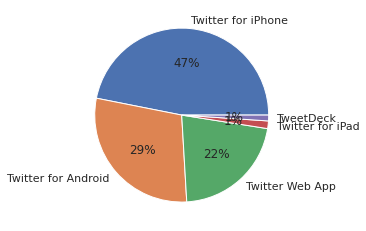

In [ ]:
# Number of tweets from different platforms (Top 5)
plat = df['source'].value_counts().reset_index()
plat.columns = ['source', 'count']
plt.pie(plat.head(5)['count'], labels = plat.head(5)['source'], autopct = '%.0f%%')
plt.show()

We can see that, majority of reactions on the documentary came from iPhone users, followed by ANdroid and Web users.

## **Data Preprocessing:**

We will just need two columns "clean_text" and "Sentiment" for our model.

In [ ]:
# Dropping redudant columns
df_cs = df[["clean_text","Sentiment"]]
df_cs.head()

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative


In [ ]:
# Check for null values
df_cs.isnull().sum()

clean_text    8
Sentiment     0
dtype: int64

In [ ]:
# As there are null values we will drop them
df_csn = df_cs.dropna()
df_csn.isnull().sum()

clean_text    0
Sentiment     0
dtype: int64

In [ ]:
# We wil create new column with Lables 
# Label encoding
cats = {"Negative":0, "Neutral":1, "Positive":2}
df_csn["Label"] = df_csn["Sentiment"].map(cats)
print(df_csn.head())
print(df_csn.shape)

                                          clean_text Sentiment  Label
0  TheSocialDilemma is an eye opener isn t it ple...   Neutral      1
1  TheSocialDilemma If we don t agree on what is ...  Positive      2
2  Watching TheSocialDilemma scary to see social ...  Negative      0
3  You check your social media before you pee in ...  Positive      2
4  watch thesocialdilemma and see what s actually...  Negative      0
(16992, 3)


We do not need to clean the tweets as they are already cleaned.

### **Splitting in Train and Test Dataset:**

In [ ]:
# This is different from the other unseen Test Dataset. This is for purpose of evaluating our model.
df_train = df_csn.iloc[:13000]
df_test = df_csn.iloc[13000:]
print("Shape of train df : ", df_train.shape)
print("Shape of test df : ", df_test.shape)

Shape of train df :  (13000, 3)
Shape of test df :  (3992, 3)


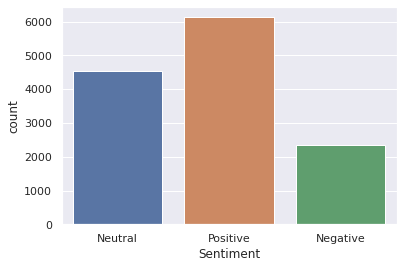

In [ ]:
# Get distribution of  Sentiments in both dfs
sns.countplot(df_train["Sentiment"])

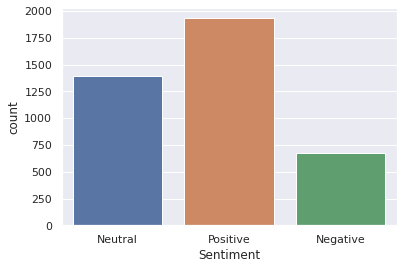

In [ ]:
sns.countplot(df_test["Sentiment"])

The distribution of different categories is similar between the two dataframes.

### Convert training dataset into tensorflow dataset format

In [ ]:
train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_train["clean_text"].values, tf.string),
            tf.cast(df_train["Label"].values, tf.int32)
        )
    )
)

In [ ]:
train_dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [ ]:
# Print few samples (first 3)
for sample, label in train_dataset.take(3):
    print('**'*50)
    print("Sample : ", sample.numpy())
    print()
    print("Label : ", label.numpy())
    print('**'*50)

****************************************************************************************************
Sample :  b'TheSocialDilemma is an eye opener isn t it please ignore the irony of me tweeting about it'

Label :  1
****************************************************************************************************
****************************************************************************************************
Sample :  b'TheSocialDilemma If we don t agree on what is true or that there is such a thing as truth we re toast This is'

Label :  2
****************************************************************************************************
****************************************************************************************************
Sample :  b'Watching TheSocialDilemma scary to see social media is fucking up the mental health of Gen X'

Label :  0
****************************************************************************************************


### Create Batches of the Dataset:

In [ ]:
# Initialise'
Buffer_size = 3000
Batch_size = 64

In [ ]:
# Create batches
train_dataset = train_dataset.shuffle(Buffer_size).batch(Batch_size).prefetch(tf.data.AUTOTUNE)  # Every batch 64 samples

In [ ]:
# Print a batch
for sample, label in train_dataset.take(1):
    print('**'*50)
    print("Sample : ", sample.numpy())
    print()
    print("Label : ", label.numpy())
    print()
    print("Len :", len(label.numpy()))
    print('**'*50)

****************************************************************************************************
Sample :  [b'So there are people going in for surgery to look like Snapchat filters TheSocialDilemma'
 b'Fan of the TheSocialDilemma on Netflix This podcast is for you debating Just because we can should we wi'
 b'I m watching TheSocialDilemma on Netflix Basically the machines are slowly destroying humanity via algorithms Fr'
 b'Watch TheSocialDilemma Makes me want to delete every single one of these social accounts'
 b'Drop everything you are watching doing and watch TheSocialDilemma Speaks what many of us fail to explain in tot'
 b'Hey I watched that show you recommended the social dilemma Great eye opening documentary I real'
 b'bitc the ENTIRE concept of social media is people s minds and attention being sold for advertising time how much'
 b'Watching TheSocialDilemma scary shit but interesting'
 b'Must see TheSocialDilemma Must be aware'
 b'Just have watched TheSocialDilemma and is

## Create Training and Validation Splits:

This will be used for training

In [ ]:
len(train_dataset) # Total batches

204

In [ ]:
# Create validation dataset
val_dataset = train_dataset.take(40)
train_dataset = train_dataset.skip(40)

# The split is 0.2

### Create Text Encoder:

The machine cannot understand words and thus to feed them to model we need to encode them. Textvectorization layer can be used for this,.

In [ ]:
# Create the  encode layer

VOCAB_SIZE = 2000 #length of bag of words
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = VOCAB_SIZE)

# Apply it on train dataset
encoder.adapt(train_dataset.map(lambda text, label : text))

In [ ]:
# Check the vocabulary

vocab = np.array(encoder.get_vocabulary())

# Print Top 30 words
vocab[0:30]

array(['', '[UNK]', 'thesocialdilemma', 'the', 'i', 'to', 'on', 'and',
       'you', 'a', 'is', 'it', 'social', 'watch', 'of', 'netflix', 's',
       'this', 'in', 'for', 'that', 'media', 'are', 'watching', 'we', 't',
       'if', 'watched', 'about', 'my'], dtype='<U22')

In [ ]:
len(vocab)

2000

# **RNN Model**

## RNN Model Architecture:

In [ ]:
# RNN model
model = Sequential([
                    encoder,
                    Embedding(input_dim = len(encoder.get_vocabulary()), output_dim = 64, mask_zero = True),
                    SimpleRNN(64),
                    Dense(64, activation="relu"),
                    Dense(3, activation="softmax")  # For 3 classes and softmax all classes will have total 1 
])

In [ ]:
# Checking model with sample without training
sample_text = ("the documetary is eye-opening, one should not think much, just learn")
preds_check = model.predict(np.array([sample_text]))
print(preds_check)

[[0.35326007 0.3143142  0.33242577]]


## Compile the model:

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = Adam(1e-4),
              metrics=['accuracy'])

Train the model :

In [ ]:
EPOCHS = 15

h = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

Epoch 1/15
164/164 [==============================] - 15s 80ms/step - loss: 1.0832 - accuracy: 0.3746 - val_loss: 1.0025 - val_accuracy: 0.5582
Epoch 2/15
164/164 [==============================] - 14s 84ms/step - loss: 0.9696 - accuracy: 0.5901 - val_loss: 0.8539 - val_accuracy: 0.6562
Epoch 3/15
164/164 [==============================] - 14s 86ms/step - loss: 0.8071 - accuracy: 0.6806 - val_loss: 0.7156 - val_accuracy: 0.7156
Epoch 4/15
164/164 [==============================] - 13s 79ms/step - loss: 0.6848 - accuracy: 0.7320 - val_loss: 0.6234 - val_accuracy: 0.7586
Epoch 5/15
164/164 [==============================] - 14s 83ms/step - loss: 0.5656 - accuracy: 0.7874 - val_loss: 0.5449 - val_accuracy: 0.7801
Epoch 6/15
164/164 [==============================] - 14s 82ms/step - loss: 0.5004 - accuracy: 0.8124 - val_loss: 0.4645 - val_accuracy: 0.8262
Epoch 7/15
164/164 [==============================] - 14s 87ms/step - loss: 0.4012 - accuracy: 0.8628 - val_loss: 0.4200 - val_accuracy:

Till now, we can see we have good accuracies and losses for training and validation, our model seems good to go. We will proceed further.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 64)          128000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 140,611
Trainable params: 140,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Save the model
print("[WIP] Saving Model...")
model.save('Model/RNN_15epochs.tf', save_format="tf")
print("Model Saved Successfully")

[WIP] Saving Model...
INFO:tensorflow:Assets written to: Model/RNN_15epochs.tf/assets
Model Saved Successfully


## Model Evaluation:

In [ ]:
# Test Dataset with labels
df_test.head()

,clean_text,Sentiment,Label
13006,Has anyone watched TheSocialDilemma on Netflix...,Neutral,1
13007,Social media platforms like Twitter Facebook I...,Positive,2
13008,That s it that s the tweet TheSocialDilemma,Neutral,1
13009,Powerful words by Justin Rosenstein former pro...,Positive,2
13010,Try dopamine fasts Do Watch this documentary T...,Neutral,1


Tweets are already cleaned so we don't have to do text cleaning.

In [ ]:
# We just require columns clean_text and Label
df_test = df_test[["clean_text", "Label"]].reset_index(drop=True)
print(df_test.head())
print(df_test.shape)

                                          clean_text  Label
0  Has anyone watched TheSocialDilemma on Netflix...      1
1  Social media platforms like Twitter Facebook I...      2
2        That s it that s the tweet TheSocialDilemma      1
3  Powerful words by Justin Rosenstein former pro...      2
4  Try dopamine fasts Do Watch this documentary T...      1
(3992, 2)


In [ ]:
# Convert into tensorflow dataset format as before
test_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_test["clean_text"].values, tf.string),
            tf.cast(df_test["Label"].values, tf.int32)
        )
    )
)

# Create batches in test dataset with same Batch_size
test_dataset = test_dataset.batch(Batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Print a sample batch
# Print a batch
for sample, label in test_dataset.take(1):
    print('**'*50)
    print("Sample : ", sample.numpy())
    print()
    print("Label : ", label.numpy())
    print()
    print("Len :", len(label.numpy()))
    print('**'*50)

****************************************************************************************************
Sample :  [b'Has anyone watched TheSocialDilemma on Netflix I recommend it'
 b'Social media platforms like Twitter Facebook IG SC and many more will never be the same for me after watching'
 b'That s it that s the tweet TheSocialDilemma'
 b'Powerful words by Justin Rosenstein former product manager at Google drawing parallels between big corporates resp'
 b'Try dopamine fasts Do Watch this documentary TheSocialDilemma'
 b'I wrote about the Netflix docudrama TheSocialDilemma what the film gets wrong about social media and what media t'
 b'It s definitely a mandate mustwatch TheSocialDilemma Netflix'
 b'TheSocialDilemma on Netflix everyone needs to watch this'
 b'AKRecommendations DocumentryFilm TheSocialDilemma Netflix Watch Now amp Learn Something New'
 b'Don t Believe everything you hear Put down ur phone at times and enjoy the moment thesocialdilemma'
 b'TheSocialDilemma by Netflix is

In [ ]:
# EValuating model on test_dataset
test_loss, test_acc = model.evaluate(test_dataset)

63/63 [==============================] - 1s 8ms/step - loss: 0.4560 - accuracy: 0.8617


In [ ]:
# Print loss and accuracy

print("The test loss is : {}".format(test_loss))
print("The test accuracy is : {}".format(test_acc))

The test loss is : 0.4560288190841675
The test accuracy is : 0.8617234230041504


The model has a good test accuracy of 86 %.

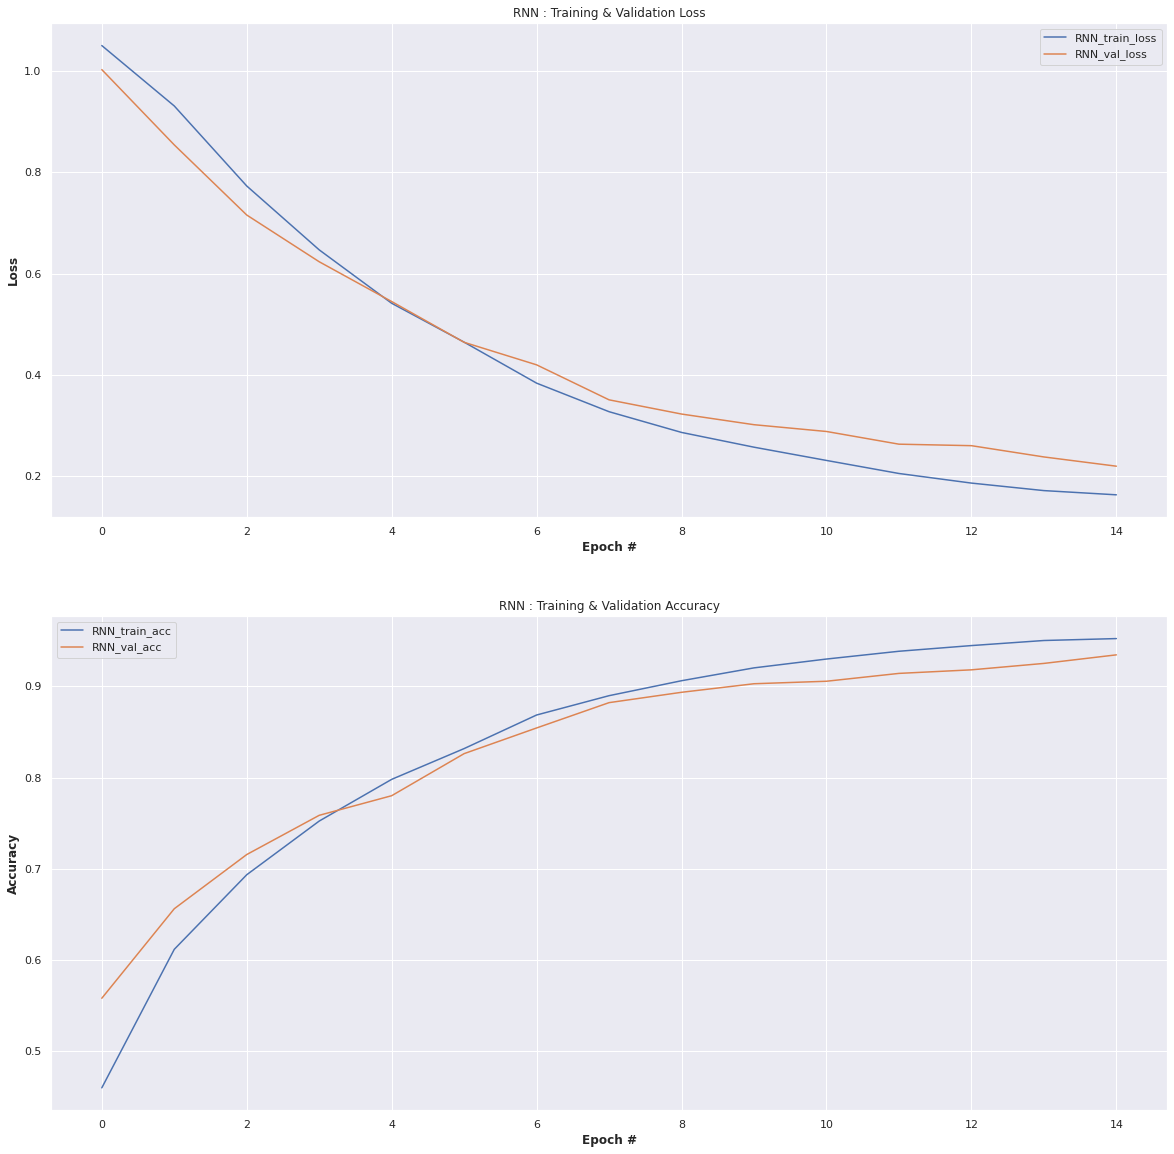

In [ ]:
# Plot the Training and Validation Accuracy and Loss for our RNN model
N = np.arange(0, EPOCHS)

fig, ax = plt.subplots(2,1, figsize = [20,20])
ax = ax.ravel()

ax[0].plot(N, h.history["loss"], label = "RNN_train_loss")
ax[0].plot(N, h.history["val_loss"], label = "RNN_val_loss")
ax[0].set_title("RNN : Training & Validation Loss")
ax[0].set_xlabel("Epoch #", weight = "bold")
ax[0].set_ylabel("Loss", weight = "bold")
ax[0].legend()

ax[1].plot(N, h.history["accuracy"], label = "RNN_train_acc")
ax[1].plot(N, h.history["val_accuracy"], label = "RNN_val_acc")
ax[1].set_title("RNN : Training & Validation Accuracy")
ax[1].set_xlabel("Epoch #", weight = "bold")
ax[1].set_ylabel("Accuracy", weight = "bold")
ax[1].legend()

plt.subplots_adjust(wspace=0.2, hspace=0.2)

We can see the curves are very smooth and converging. <br>Our model is pretty well-trained and no over-fitting and over-training.

In [ ]:
# Making predictions on df_test
preds = model.predict(np.array(df_test["clean_text"]))
preds[0:10]

array([[2.7320109e-02, 8.7812716e-01, 9.4552696e-02],
       [2.2154214e-04, 5.8599682e-05, 9.9971980e-01],
       [1.1953964e-02, 9.7359854e-01, 1.4447478e-02],
       [2.1631760e-03, 2.2063626e-03, 9.9563050e-01],
       [1.0599000e-02, 9.8767507e-01, 1.7259133e-03],
       [6.6777754e-01, 5.4265494e-03, 3.2679597e-01],
       [8.7817665e-03, 9.7926074e-01, 1.1957447e-02],
       [7.7389311e-03, 9.8324388e-01, 9.0172254e-03],
       [3.0153591e-02, 9.2404693e-02, 8.7744176e-01],
       [6.0633343e-01, 8.1827659e-03, 3.8548383e-01]], dtype=float32)

In [ ]:
np.array(df_test["clean_text"][3991])

array('had the impression that is actually sitting in a jail cell in TheSocialDilemma telling us discomfo',
      dtype='<U98')

In [ ]:
# we need to get label for prediction from probabailities
pred = []
for i in range(len(preds_prob)):
    index = preds_prob[i].argmax()
    pred.append(index)

pred[0:10]

[1, 2, 1, 2, 1, 0, 1, 1, 2, 0]

In [ ]:
df_test["Pred"] = pred
df_test.head()

,clean_text,Label,Pred
0,Has anyone watched TheSocialDilemma on Netflix...,1,1
1,Social media platforms like Twitter Facebook I...,2,2
2,That s it that s the tweet TheSocialDilemma,1,1
3,Powerful words by Justin Rosenstein former pro...,2,2
4,Try dopamine fasts Do Watch this documentary T...,1,1


### Confusion Matrix:

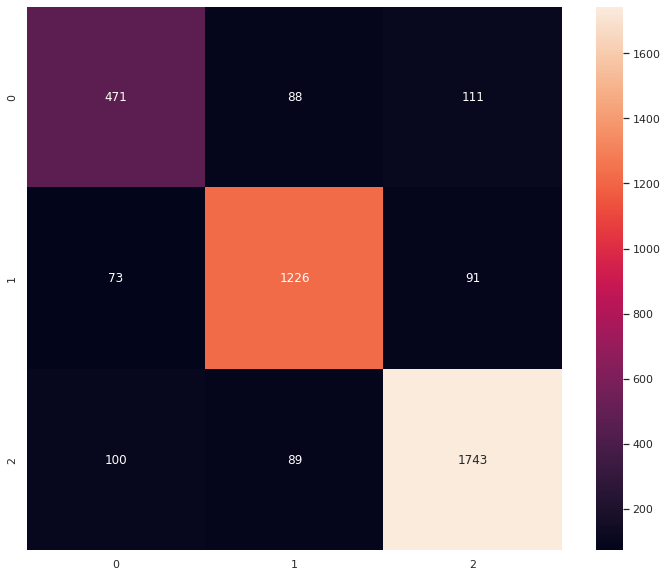

In [ ]:
# Confusion Matrix

cm = confusion_matrix(df_test["Label"], df_test["Pred"])
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d')

Number of True Positives is more.

In [ ]:
# Classification Report
print("Classification Report of RNN")
print(classification_report(df_test["Label"], df_test["Pred"]))

Classification Report of RNN
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       670
           1       0.87      0.88      0.88      1390
           2       0.90      0.90      0.90      1932

    accuracy                           0.86      3992
   macro avg       0.83      0.83      0.83      3992
weighted avg       0.86      0.86      0.86      3992



Model Performance is okay. Accuracy is 86% , and recall and precision are considerably good.

In [ ]:
# Model Accuracy
acc=accuracy_score(df_test["Label"], df_test["Pred"])
print("The accuracy of the RNN model : {:.2f} % ".format(acc*100))

The accuracy of the RNN model : 86.17 % 


The accuracy score of our model is pretty nice and our model is good.

## **Predictions on Test Data without labels:**

In [ ]:
# Load data
test_data = pd.read_csv("Tweets/tweets_test.csv")
test_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


There is no label we need only "clean_text" column.


In [ ]:
# Check missing values for clean_text
test_data_ct = test_data[["clean_text"]]
test_data_ct.columns=["clean_text"]
test_data_ct.isnull().sum()

clean_text    1
dtype: int64

In [ ]:
test_data_ct.clean_text = test_data_ct.clean_text.fillna('Null') 
test_data_ct.isnull().sum()

clean_text    0
dtype: int64

In [ ]:
# Making Predictions
# Making predictions on df_test
probs = model.predict(np.array(test_data_ct["clean_text"]))
probs[0:10]

array([[1.9814460e-02, 9.5975280e-01, 2.0432737e-02],
       [1.8044403e-02, 9.4653910e-01, 3.5416514e-02],
       [6.0271244e-03, 2.2726765e-04, 9.9374557e-01],
       [1.0768108e-02, 9.7784460e-01, 1.1387363e-02],
       [1.8749058e-02, 4.6978169e-03, 9.7655314e-01],
       [1.1398599e-01, 3.6797265e-03, 8.8233429e-01],
       [4.8661832e-02, 9.3380743e-01, 1.7530762e-02],
       [4.5403790e-02, 9.2998070e-01, 2.4615530e-02],
       [2.7248554e-02, 8.2016978e-03, 9.6454972e-01],
       [3.3297963e-02, 5.2880519e-03, 9.6141398e-01]], dtype=float32)

In [ ]:
# we need to get label for prediction from probabailities
Sentiment = []
classes=["Negative","Neutral","Positive"]
for i in range(len(probs)):
    index = probs[i].argmax()
    sent = classes[index]
    Sentiment.append(sent)
    
Sentiment[:10]

['Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive']

In [ ]:
# Add Sentiment column to our original datasheet
test_data["Sentiment"] = Sentiment
test_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon,Neutral
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...,Neutral
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...,Positive
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix,Neutral
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on,Positive


In [ ]:
# Save the file 
test_data.to_csv('tweets_test_submission.csv')

View the file in drive folder.
<br>
<a href="https://drive.google.com/drive/folders/1YWKIr5yL4mfsiXFAW1Ft7CTxlJ8KRGBh?usp=sharing"> Drive Folder </a>

# THANK YOU